<a href="https://colab.research.google.com/github/saragamilmohamed/KNN/blob/main/Iphones%20Purchase%20by%20KNN/iphone_purchase_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/iphone_purchase_records.csv')

In [ ]:
df.head()

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   Salary           400 non-null    int64 
 3   Purchase Iphone  400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [ ]:
df.isnull().sum()

,0
Gender,0
Age,0
Salary,0
Purchase Iphone,0


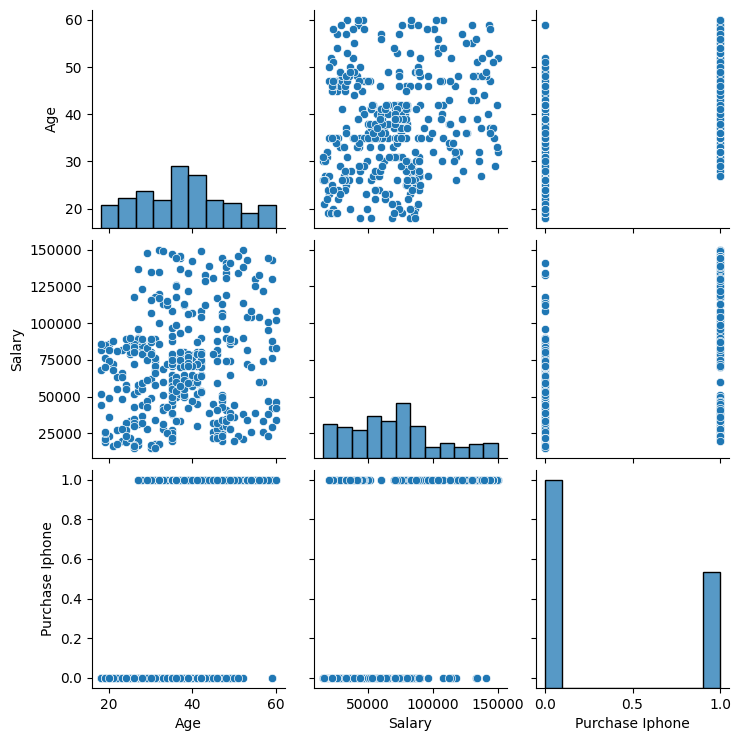

In [ ]:
sns.pairplot(df)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])

In [ ]:
X=df.drop('Purchase Iphone',axis=1)
y=df['Purchase Iphone']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=4)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
scaler.fit(X_test)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
y_pred=knn.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report ,confusion_matrix
print(classification_report(y_pred,y_test) )

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        59
           1       0.76      0.76      0.76        21

    accuracy                           0.88        80
   macro avg       0.84      0.84      0.84        80
weighted avg       0.88      0.88      0.88        80



<Axes: >

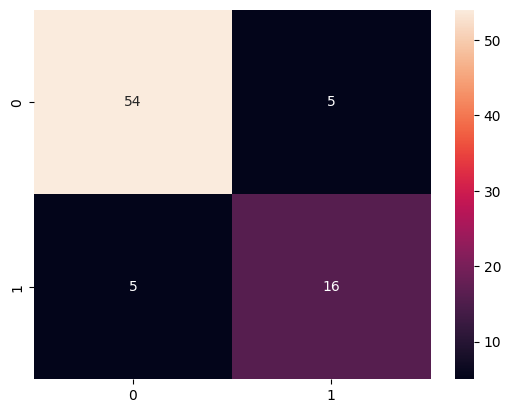

In [ ]:
sns.heatmap(confusion_matrix(y_pred,y_test),annot=True)

In [ ]:
error_rate=[]
k=[]
for i in range(1,40):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  pred_i=knn.predict(X_test)
  error_rate.append(np.mean(pred_i != y_test))
  k.append(i)

In [ ]:
z=zip(k,error_rate)

In [ ]:
print(error_rate)
print(len(error_rate))

[0.125, 0.125, 0.1, 0.1125, 0.1125, 0.1, 0.075, 0.0875, 0.075, 0.075, 0.075, 0.0875, 0.0875, 0.0875, 0.0875, 0.1125, 0.1, 0.1125, 0.1125, 0.1125, 0.1125, 0.1125, 0.1125, 0.1125, 0.1125, 0.1125, 0.1125, 0.15, 0.125, 0.1375, 0.125, 0.1375, 0.1375, 0.1375, 0.1375, 0.1375, 0.1375, 0.125, 0.125]
39


In [ ]:
for i in z:
  print(i)

(1, 0.125)
(2, 0.125)
(3, 0.1)
(4, 0.1125)
(5, 0.1125)
(6, 0.1)
(7, 0.075)
(8, 0.0875)
(9, 0.075)
(10, 0.075)
(11, 0.075)
(12, 0.0875)
(13, 0.0875)
(14, 0.0875)
(15, 0.0875)
(16, 0.1125)
(17, 0.1)
(18, 0.1125)
(19, 0.1125)
(20, 0.1125)
(21, 0.1125)
(22, 0.1125)
(23, 0.1125)
(24, 0.1125)
(25, 0.1125)
(26, 0.1125)
(27, 0.1125)
(28, 0.15)
(29, 0.125)
(30, 0.1375)
(31, 0.125)
(32, 0.1375)
(33, 0.1375)
(34, 0.1375)
(35, 0.1375)
(36, 0.1375)
(37, 0.1375)
(38, 0.125)
(39, 0.125)


Text(0, 0.5, 'Error Rate')

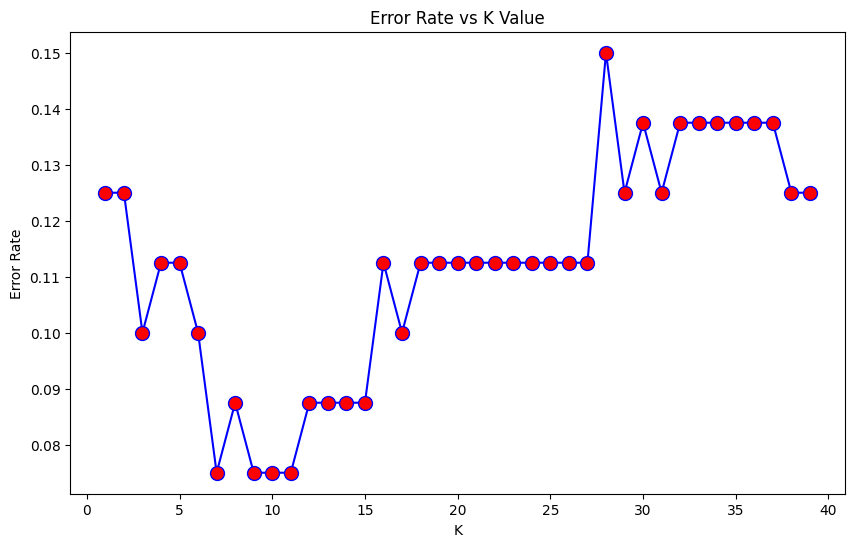

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='-',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
from sklearn.metrics import classification_report ,confusion_matrix
print(classification_report(y_pred,y_test) )

              precision    recall  f1-score   support

           0       0.93      0.96      0.95        57
           1       0.90      0.83      0.86        23

    accuracy                           0.93        80
   macro avg       0.92      0.90      0.91        80
weighted avg       0.92      0.93      0.92        80



In [ ]:
from sklearn.model_selection import cross_val_score
k_values=range(1,40)
scores=[]
for k in k_values:
  knn=KNeighborsClassifier(n_neighbors=k)
  score=cross_val_score(knn,X,y,cv=10,scoring='accuracy')
  scores.append(np.mean(score))
best_k= k_values[np.argmax(scores)]
print(f'The best k is {best_k}')

The best k is 1


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
from sklearn.metrics import classification_report ,confusion_matrix
print(classification_report(y_pred,y_test) )

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        59
           1       0.76      0.76      0.76        21

    accuracy                           0.88        80
   macro avg       0.84      0.84      0.84        80
weighted avg       0.88      0.88      0.88        80



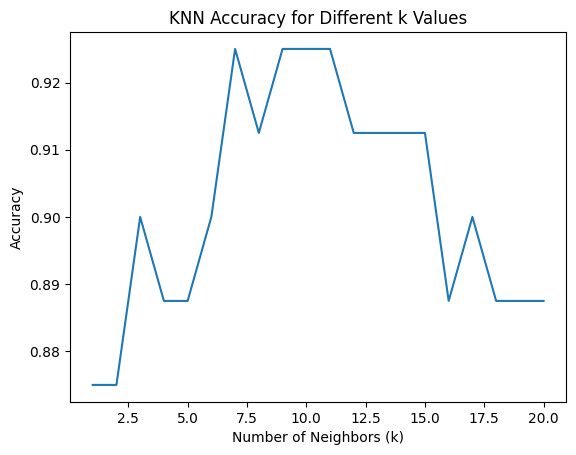

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

k_values = range(1, 21)
accuracies = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    accuracy = model.score(X_test, y_test)
    accuracies.append(accuracy)

plt.plot(k_values, accuracies)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy for Different k Values')
plt.show()